--- Demandas de Serviço (D_i = V_i * S_i) ---
CPU: 0.0961 s
Disco 1: 0.1083 s
Disco 2: 0.1083 s
Disco 3: 0.1083 s

Demanda Total (D): 0.4211 s
Gargalo do Sistema: Disco 3 (D_max = 0.1083 s)
Throughput de Saturação (1/D_max): 9.2316 tps

--- Tempo de Resposta por Recurso (R_i = S_i / (1 - U_i)) ---
CPU: U_i = 0.3654, R_i = 0.0047 s
Disco 1: U_i = 0.4115, R_i = 0.0160 s
Disco 2: U_i = 0.4115, R_i = 0.0194 s
Disco 3: U_i = 0.4116, R_i = 0.0184 s

Tempo de Resposta do Sistema na Saturação (R): 0.7037 s


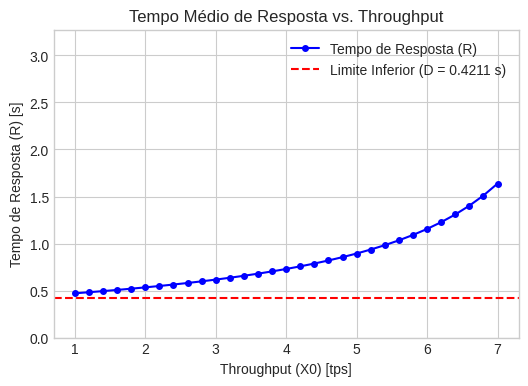

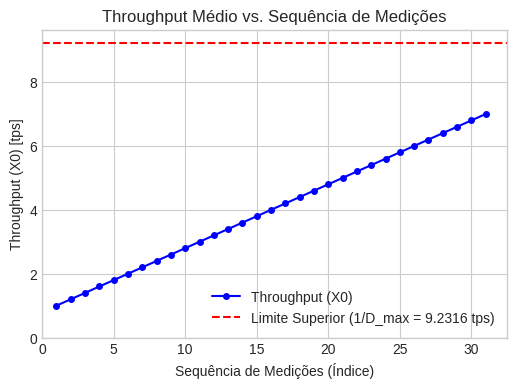

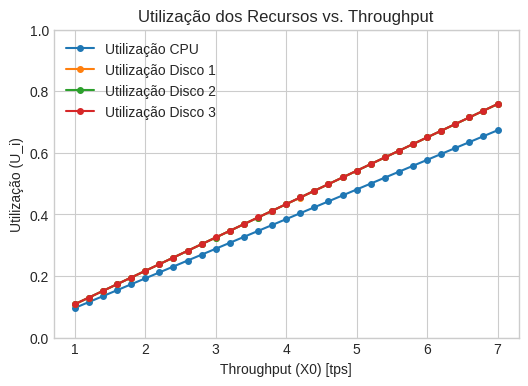

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def analisar_modelo_aberto(nomes_recursos, V, S, X_0, max_load_factor=0.99):
    D = {}
    print("--- Demandas de Serviço (D_i = V_i * S_i) ---")
    for recurso in nomes_recursos:
        D[recurso] = V[recurso] * S[recurso]
        print(f"{recurso}: {D[recurso]:.4f} s")

    D_total = sum(D.values())
    print(f"\nDemanda Total (D): {D_total:.4f} s")

    gargalo_nome = max(D, key=D.get)
    D_max = D[gargalo_nome]
    print(f"Gargalo do Sistema: {gargalo_nome} (D_max = {D_max:.4f} s)")

    X_saturacao = 1 / D_max
    print(f"Throughput de Saturação (1/D_max): {X_saturacao:.4f} tps")

    print("\n--- Tempo de Resposta por Recurso (R_i = S_i / (1 - U_i)) ---")
    for recurso in nomes_recursos:
        U_i = X_0 * D[recurso]
        R_i = S[recurso] / (1 - U_i)
        print(f"{recurso}: U_i = {U_i:.4f}, R_i = {R_i:.4f} s")

    R_sistema = 0
    for recurso in nomes_recursos:
        U_i = X_0 * D[recurso]
        R_i = S[recurso] / (1 - U_i)
        R_sistema += V[recurso] * R_i

    print(f"\nTempo de Resposta do Sistema na Saturação (R): {R_sistema:.4f} s")

    num_medicoes = 31

    X0_valores = np.linspace(1, 7, num_medicoes)
    # X0_valores = np.linspace(1, X_saturacao * max_load_factor, num_medicoes)
    R_valores = []

    for x0 in X0_valores:
        R_sistema = 0
        saturado = False

        for recurso in nomes_recursos:
            U_i = x0 * D[recurso]
            if U_i >= 1.0:
                saturado = True
                break

            R_i = S[recurso] / (1 - U_i)
            R_sistema += V[recurso] * R_i

        if saturado:
            X0_valores = X0_valores[:len(R_valores)]
            break

        R_valores.append(R_sistema)

    plt.style.use('seaborn-v0_8-whitegrid')

    # Plot Response Time vs Throughput

    plt.figure(figsize=(6, 4))
    plt.plot(X0_valores, R_valores, 'b-o', markersize=4, label='Tempo de Resposta (R)')
    plt.axhline(y=D_total, color='red', linestyle='--', label=f'Limite Inferior (D = {D_total:.4f} s)')
    plt.title('Tempo Médio de Resposta vs. Throughput')
    plt.xlabel('Throughput (X0) [tps]')
    plt.ylabel('Tempo de Resposta (R) [s]')
    plt.legend()
    if R_valores:
        plt.ylim(bottom=0, top=min(R_valores[-1] * 2, D_total * 10))
    plt.grid(True)
    plt.show()

    # Plot Throughput vs Measurement Sequence

    plt.figure(figsize=(6, 4))
    indices_x = np.arange(1, len(X0_valores) + 1)
    plt.plot(indices_x, X0_valores, 'b-o', markersize=4, label='Throughput (X0)')
    plt.axhline(y=X_saturacao, color='red', linestyle='--',
                label=f'Limite Superior (1/D_max = {X_saturacao:.4f} tps)')
    plt.title('Throughput Médio vs. Sequência de Medições')
    plt.xlabel('Sequência de Medições (Índice)')
    plt.ylabel('Throughput (X0) [tps]')
    plt.legend()
    plt.ylim(bottom=0)
    plt.xlim(left=0)
    plt.grid(True)
    plt.show()

    # Utilização em cada recurso X throughput (juntos no mesmo gráfico)
    plt.figure(figsize=(6, 4))
    for recurso in nomes_recursos:
        U_i_valores = [x0 * D[recurso] for x0 in X0_valores]
        plt.plot(X0_valores, U_i_valores, marker='o', markersize=4, label=f'Utilização {recurso}')

    plt.title('Utilização dos Recursos vs. Throughput')
    plt.xlabel('Throughput (X0) [tps]')
    plt.ylabel('Utilização (U_i)')
    plt.legend()
    plt.ylim(bottom=0, top=1)
    plt.grid(True)
    plt.show()


# --- DADOS DE ENTRADA --- aaa
recursos = ['CPU', 'Disco 1', 'Disco 2', 'Disco 3']
V_i = {'CPU': 32.05, 'Disco 1': 11.52, 'Disco 2': 9.5, 'Disco 3': 10.03}
S_i = {'CPU': 0.0030, 'Disco 1': 0.0094, 'Disco 2': 0.0114, 'Disco 3': 0.0108}
X_0 = 3.8

analisar_modelo_aberto(nomes_recursos=recursos, V=V_i, S=S_i, X_0=X_0)
